<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/17_3_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

텐서플로 허브를 통해 
사전학습된 더 많은 모델을 활용할 수 있다

https://www.tensorflow.org/hub

객체 감지 모델 중 하나인 
Faster R-CNN을 불러와서 테스트해봅시다

https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf

In [ ]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

detector =  hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
from google.colab import drive
drive.mount('/g')

Mounted at /g


In [ ]:
import cv2

img = cv2.imread('/g/My Drive/Tensorflow AI/Security-Tips-for-Construction-Site-Theft.jpg')

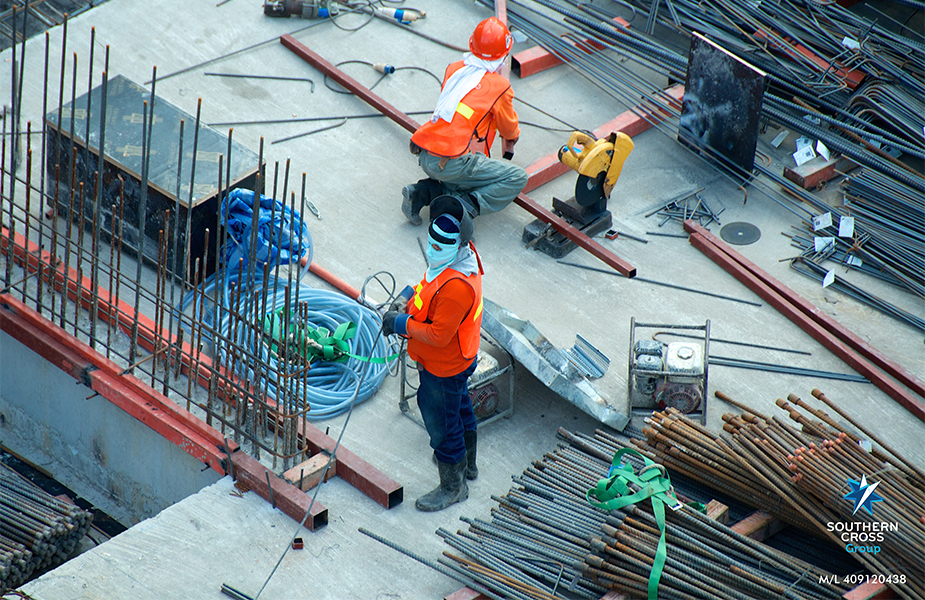

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
img.shape

(600, 925, 3)

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
img = img/255

In [ ]:
img.shape

(600, 925, 3)

In [ ]:
img.max()

1.0

In [ ]:
img.min()

0.0

In [ ]:
img_tf = tf.image.convert_image_dtype(img, tf.float32)

In [ ]:
img_tf = tf.expand_dims(img_tf,0)

In [ ]:
img_tf.get_shape()

TensorShape([1, 600, 925, 3])

In [ ]:
res = detector(img_tf)

In [ ]:
res

{'detection_boxes': <tf.Tensor: shape=(100, 4), dtype=float32, numpy=
 array([[3.08043331e-01, 4.19682294e-01, 8.40078175e-01, 5.30282080e-01],
        [2.32986454e-02, 4.30600494e-01, 4.30646002e-01, 5.69147050e-01],
        [7.50673175e-01, 4.50371623e-01, 8.53563666e-01, 5.08914530e-01],
        [6.13903701e-01, 4.51450080e-01, 7.81396627e-01, 5.20362973e-01],
        [4.06160027e-01, 4.33683276e-01, 7.85066903e-01, 5.27024746e-01],
        [7.93061703e-02, 4.42254901e-01, 3.72130692e-01, 5.68573952e-01],
        [4.46661532e-01, 3.89146239e-01, 5.31374156e-01, 4.33651507e-01],
        [5.30028204e-03, 3.53856981e-01, 5.16822003e-02, 4.00483459e-01],
        [2.11350426e-01, 5.65035403e-01, 4.32185411e-01, 6.93591893e-01],
        [3.59096266e-02, 1.16592655e-02, 9.58613634e-01, 1.00000000e+00],
        [1.40452264e-02, 3.55356485e-01, 4.92294058e-02, 4.01479483e-01],
        [2.96590537e-01, 4.30348366e-01, 3.75717133e-01, 4.65044647e-01],
        [1.56741012e-02, 3.53053272e-01, 4

In [ ]:
result = {key:value.numpy() for key,value in res.items()}

In [ ]:
result

{'detection_boxes': array([[3.08043331e-01, 4.19682294e-01, 8.40078175e-01, 5.30282080e-01],
        [2.32986454e-02, 4.30600494e-01, 4.30646002e-01, 5.69147050e-01],
        [7.50673175e-01, 4.50371623e-01, 8.53563666e-01, 5.08914530e-01],
        [6.13903701e-01, 4.51450080e-01, 7.81396627e-01, 5.20362973e-01],
        [4.06160027e-01, 4.33683276e-01, 7.85066903e-01, 5.27024746e-01],
        [7.93061703e-02, 4.42254901e-01, 3.72130692e-01, 5.68573952e-01],
        [4.46661532e-01, 3.89146239e-01, 5.31374156e-01, 4.33651507e-01],
        [5.30028204e-03, 3.53856981e-01, 5.16822003e-02, 4.00483459e-01],
        [2.11350426e-01, 5.65035403e-01, 4.32185411e-01, 6.93591893e-01],
        [3.59096266e-02, 1.16592655e-02, 9.58613634e-01, 1.00000000e+00],
        [1.40452264e-02, 3.55356485e-01, 4.92294058e-02, 4.01479483e-01],
        [2.96590537e-01, 4.30348366e-01, 3.75717133e-01, 4.65044647e-01],
        [1.56741012e-02, 3.53053272e-01, 4.31522392e-02, 4.01121527e-01],
        [5.62365074

In [ ]:
  print("Found %d objects." % len(result["detection_scores"]))

Found 100 objects.


In [ ]:
def show_boxes(img, result, threshold):
  height, width, channel = img.shape 
  n = len(result["detection_scores"])
  boxes = result['detection_boxes']
  for i in range(n):
    # box
    if result['detection_scores'][i]<threshold: continue
    startX = int(boxes[i][1]* width)
    startY = int(boxes[i][0]* height)
    endX = int(boxes[i][3]* width)
    endY = int(boxes[i][2]* height)
    cv2.rectangle(img, (startX, startY), (endX, endY), (0, 0, 255), 2)

    # text
    title = result['detection_class_entities'][i]
    prob = round(result['detection_scores'][i] * 100,1)
    img2 = cv2.putText(img, title.decode() + ' ' + str(prob) + '%', (startX, startY-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)


In [ ]:
img2 = cv2.imread('/g/My Drive/Tensorflow AI/Security-Tips-for-Construction-Site-Theft.jpg')

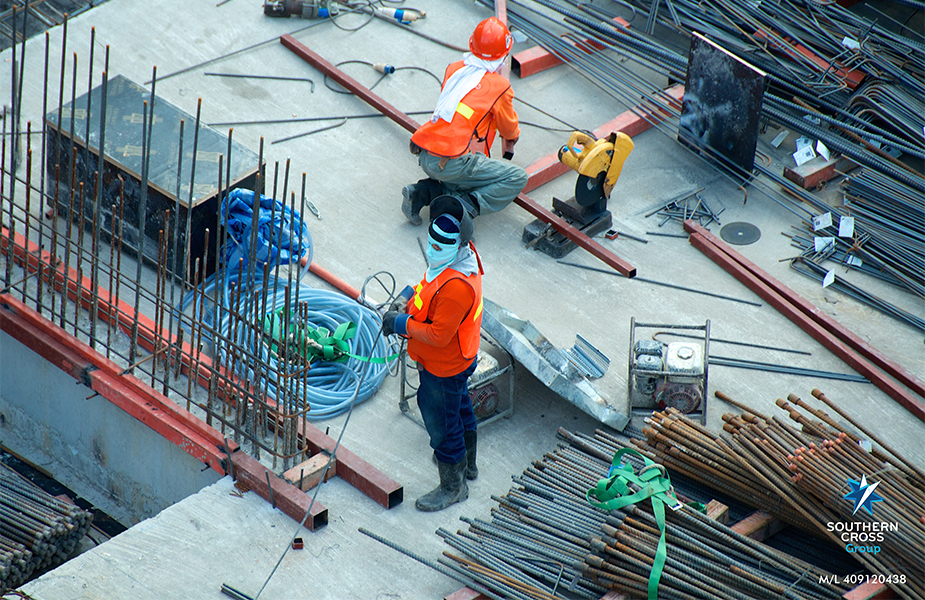

In [ ]:
cv2_imshow(img2)

In [ ]:
show_boxes(img2, result, 0.7)

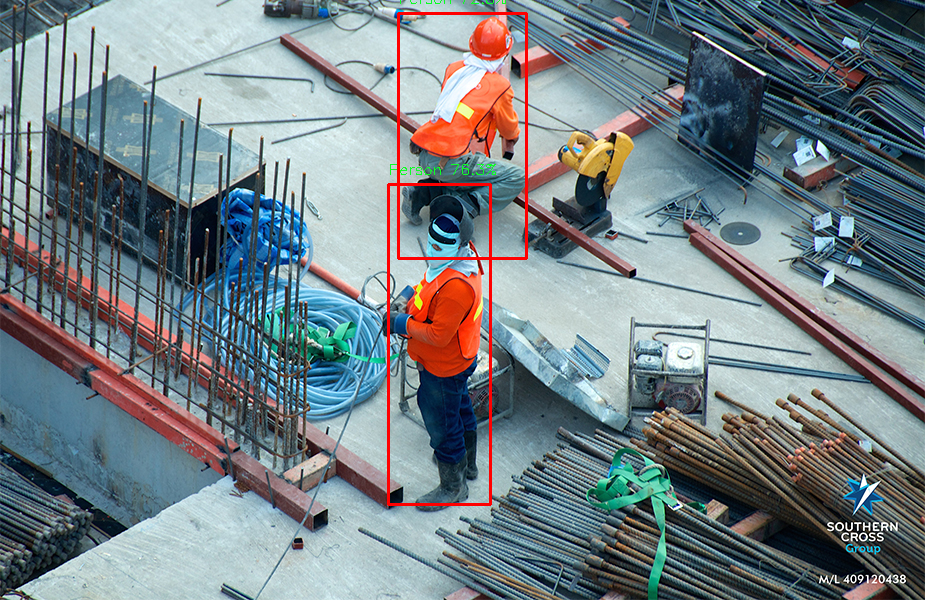

In [ ]:
cv2_imshow(img2)

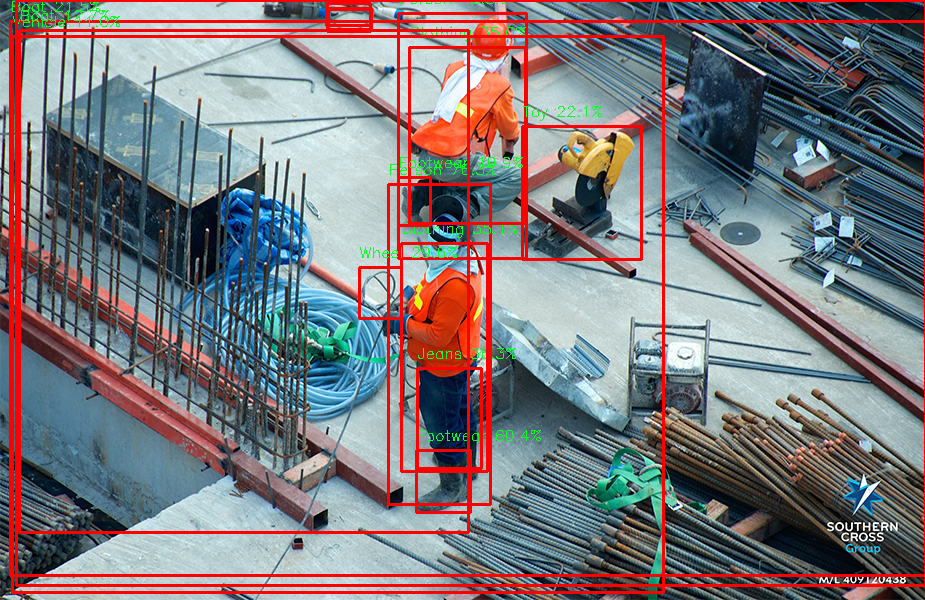

In [ ]:
show_boxes(img2, result, 0.1)
cv2_imshow(img2)